In [77]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from Data_cleaning import *
from helpers import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Load the data. Estimated time for Fox's computer: 19 minutes
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("data\dataset\dataset")

<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
<>:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
C:\Users\alumne\AppData\Local\Temp\ipykernel_624\194566319.py:1: SyntaxWarning: "\d" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\d"? A raw string is also an option.
  x_train, x_test, y_train, train_ids, test_ids = load_csv_data("data\dataset\dataset")


In [ ]:
# Feature selection
x_train, used_features = remove_nan_features(x_train, threshold=0.3) #from know, only remove features with more than 30% of NaN values

In [51]:
# Data reduction for faster testing
x_train = x_train[:10000]  # we take a subset of the data to make it faster
y_train = y_train[:10000]  # we take a subset of the data to make it faster
x_values = x_train[1000:]    # we take a subset of the data to make it faster
y_values = y_train[1000:]    # we take a subset of the data to make it faster
print(x_train.shape, y_train.shape)

(10000, 144) (10000,)


In [86]:
# Example of running logistic regression with penalization
X_train, X_values, Y_train, Y_values = clean_data(x_train, x_values, y_train, y_values)
loss, w = logistic_regression_penalized_gradient_descent(Y_train, X_train, lambda_=1.0, gamma=0.5)
preds = predict_logistic(X_values, w)
acc = np.mean(preds == Y_values)
dispersion_pred = np.sum(preds) / preds.shape[0]
dispersion_true = np.sum(Y_values) / Y_values.shape[0]
print("Validation accuracy:", acc)
print("Dispersion in validation set:", dispersion_true)
print("Dispersion in predictions:", dispersion_pred)

Iteration     0, loss = 0.693147
Iteration  1000, loss = 1.220690
Iteration  2000, loss = 1.220690
Iteration  3000, loss = 1.220690
Iteration  4000, loss = 1.220690
Iteration  5000, loss = 1.220690
Iteration  6000, loss = 1.220690
Iteration  7000, loss = 1.220690
Iteration  8000, loss = 1.220690
Iteration  9000, loss = 1.220690
Validation accuracy: 0.762
Dispersion in validation set: 0.08666666666666667
Dispersion in predictions: 0.18244444444444444


In [89]:
print(X_train.shape, Y_train.shape)
w = np.array(w)
print(w.shape)
tvals, ses, pvals, H = logistic_tvalues(X_train, Y_train, w, lambda_=1.0, eps=1e-12, batch_size=20000, return_cov=False)

(1744, 144) (1744,)
(145,)
entered
2
(1744, 145) (145,)


In [90]:
reamining_features, delta = one_step_elimination_mask(w, H) 
print("Number of remaining features:", np.sum(reamining_features), "out of", len(reamining_features) -1) # we don't consider the intercept
X_train_reduced = X_train[:, reamining_features[1:]] # we don't consider the intercept
X_values_reduced = X_values[:, reamining_features[1:]]
loss, w = logistic_regression_penalized_gradient_descent(Y_train, X_train_reduced, lambda_=1.0, gamma=0.5)

NameError: name 'one_step_elimination_mask' is not defined

In [85]:
preds = predict_logistic(X_values_reduced, w)
acc = np.mean(preds == Y_values)
dispersion_pred = np.sum(preds) / preds.shape[0]
dispersion_true = np.sum(Y_values) / Y_values.shape[0]
print("Validation accuracy:", acc)
print("Dispersion in validation set:", dispersion_true)
print("Dispersion in predictions:", dispersion_pred)

Validation accuracy: 0.3128888888888889
Dispersion in validation set: 0.08666666666666667
Dispersion in predictions: 0.7484444444444445


In [ ]:
# grid search to find the best lambda. Time estimated for Fox's computer: 47 minutes
lambda_max, lambda_min = 7, -7 # defined as integers, but actually 1e-7, 1e7
i, j = lambda_min, lambda_max
Error_lambda = np.zeros(lambda_max - lambda_min + 1)

for k in range(lambda_min, lambda_max + 1):
    acc_k = kfold_logistic_ridge(x_train, y_train, k=5, gamma=0.5, lambda_=10**k, threshold=1e-8, random_state=None)
    Error_lambda[k - lambda_min] = 1 - acc_k
    print("Tested lambda=10^", k, " with accuracy=", acc_k)


Start cleaning batch 1 out of 5
Starting replacing NaNs using strategy: normal
NaNs replaced.
Starting replacing NaNs using strategy: normal
NaNs replaced.
Cleaning of batch 1 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration  1000, loss = 0.420010
Iteration  2000, loss = 0.417973
Iteration  3000, loss = 0.417095
Iteration  4000, loss = 0.416621
Iteration  5000, loss = 0.416323
Iteration  6000, loss = 0.416114
Iteration  7000, loss = 0.415956
Iteration  8000, loss = 0.415829
Iteration  9000, loss = 0.415722
Training done. Score for batch 1 : 0.7255

Start cleaning batch 2 out of 5
Starting replacing NaNs using strategy: normal
NaNs replaced.
Starting replacing NaNs using strategy: normal
NaNs replaced.
Cleaning of batch 2 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration  1000, loss = 0.430626
Iteration  2000, loss = 0.429651
Iteration  3000, loss = 0.429319
Iteration  4000, loss = 0.429142
Iteration  5000, loss = 0.429017
Iteration

c:\Users\alumne\Documents\GitHub\ML_proj1\project1\implementations.py:6: RuntimeWarning: overflow encountered in matmul
  
c:\Users\alumne\Documents\GitHub\ML_proj1\project1\implementations.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  
c:\Users\alumne\Documents\GitHub\ML_proj1\project1\implementations.py:4: RuntimeWarning: overflow encountered in matmul
  
c:\Users\alumne\Documents\GitHub\ML_proj1\project1\implementations.py:6: RuntimeWarning: overflow encountered in multiply
  
c:\Users\alumne\Documents\GitHub\ML_proj1\project1\implementations.py:38: RuntimeWarning: overflow encountered in matmul
  def compute_gradient_logistic(y, tx, w):
c:\Users\alumne\Documents\GitHub\ML_proj1\project1\implementations.py:7: RuntimeWarning: overflow encountered in multiply
  def mse_loss(y, tx, w):
c:\Users\alumne\Documents\GitHub\ML_proj1\project1\implementations.py:4: RuntimeWarning: invalid value encountered in matmul
  
c:\Users\alumne\Documents\GitHub\ML_proj1\project1\

Iteration  1000, loss = nan
Iteration  2000, loss = nan
Iteration  3000, loss = nan
Iteration  4000, loss = nan
Iteration  5000, loss = nan
Iteration  6000, loss = nan
Iteration  7000, loss = nan
Iteration  8000, loss = nan
Iteration  9000, loss = nan
Training done. Score for batch 1 : 0.92

Start cleaning batch 2 out of 5
Starting replacing NaNs using strategy: normal
NaNs replaced.
Starting replacing NaNs using strategy: normal
NaNs replaced.
Cleaning of batch 2 done. Stating the model training.
Iteration     0, loss = 0.693147
Iteration  1000, loss = nan
Iteration  2000, loss = nan
Iteration  3000, loss = nan
Iteration  4000, loss = nan
Iteration  5000, loss = nan
Iteration  6000, loss = nan
Iteration  7000, loss = nan
Iteration  8000, loss = nan
Iteration  9000, loss = nan
Training done. Score for batch 2 : 0.918

Start cleaning batch 3 out of 5
Starting replacing NaNs using strategy: normal
NaNs replaced.
Starting replacing NaNs using strategy: normal
NaNs replaced.
Cleaning of ba

In [40]:
#saving the output of the grid search
plx = np.arange(lambda_min, lambda_max + 1, 1)
ply = Error_lambda
np.save("grid_search_lambda.npy", (plx, ply))      # Save
# plxh, plyh = np.load("grid_search_lambda.npy")     # Load
# print(plx, ply)

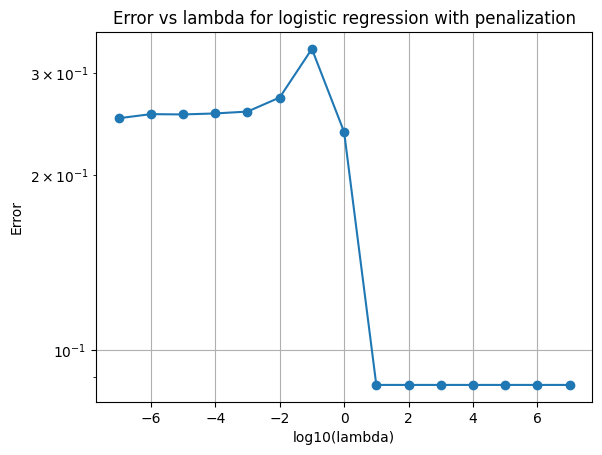

[0.2504 0.2545 0.2542 0.2552 0.2571 0.2718 0.3294 0.2372 0.0872 0.0872
 0.0872 0.0872 0.0872 0.0872 0.0872]


In [42]:
#plot the error in terms of lambda
plt.semilogy(plx, ply, 'o-')
plt.xlabel('log10(lambda)')
plt.ylabel('Error')
plt.title('Error vs lambda for logistic regression with penalization')
plt.grid()
plt.show()
print(ply)

In [ ]:
#features selection with t-values

